In [1]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#quick cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
#only data analysts from US 
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#dropping NaN values from 'salary_year_avg'
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [5]:
df_DA_US = df_DA_US.explode('job_skills')

In [12]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

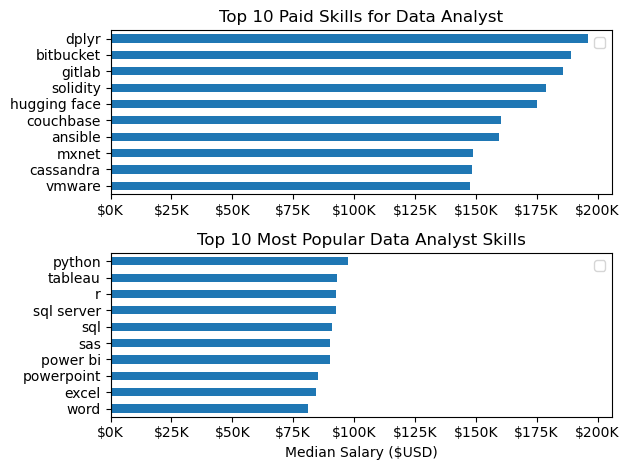

In [25]:
fig, ax = plt.subplots(2,1)

df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0])
ax[0].invert_yaxis() #option one for reversing the order
ax[0].set_title('Top 10 Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1]) 
            #option two for reversing the order
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most Popular Data Analyst Skills')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].legend('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()

### END OF SKILL PAY ANALYSIS
---